In [ ]:
# Import fichiers

DATA_PATH = r"C:\Users\valen\Desktop\Databases_SkinCancerProject\Database_Model1_MalinBenin"


In [ ]:
IMG_SIZE = 256 # Taille nécessaire pour MobileNet

In [ ]:
import os
import cv2
import numpy as np


new_size = (IMG_SIZE, IMG_SIZE)  # Taille à redimensionner

# Initialisation des listes pour stocker les données
X = []  # Liste des images (format (hauteur, largeur, canaux))
y = []  # Liste des labels (0 pour benign, 1 pour malignant)

# Parcours des dossiers et assignation des labels
categories = {"benign": 0, "malignant": 1}

for category, label in categories.items():
    chemin_dossier = os.path.join(DATA_PATH, category)

    if not os.path.exists(chemin_dossier):
        print(f"Le dossier {chemin_dossier} n'existe pas !")
        continue

    for image_name in os.listdir(chemin_dossier):
        image_path = os.path.join(chemin_dossier, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Chargement en couleur

        if img is not None:
            img_resized = cv2.resize(img, new_size, interpolation=cv2.INTER_AREA)  # Redimensionner
            img_resized = img_resized / 255.0  # Normalisation entre 0 et 1
            X.append(img_resized)  # Ajouter l'image redimensionnée sans l'aplatir
            y.append(label)

# Conversion en arrays numpy pour le ML
X = np.array(X)
y = np.array(y)

# Affichage des informations sur les données traitées
print(f"Nombre d'images traitées : {len(X)}")
print(f"Shape de X : {X.shape}")  # (nombre_images, IMG_SIZE, IMG_SIZE, 3)
print(f"Shape de y : {y.shape}")  # (nombre_images,)


Nombre d'images traitées : 3692
Shape de X : (3692, 256, 256, 3)
Shape de y : (3692,)


In [ ]:
print(X[:5])  # Affiche les 5 premières images sous forme de vecteurs
print(y[:5])  # Affiche les 5 premiers labels


[[[[0.58039216 0.54901961 0.69411765]
   [0.60784314 0.58431373 0.7372549 ]
   [0.60784314 0.59607843 0.74117647]
   ...
   [0.62745098 0.61176471 0.74901961]
   [0.62352941 0.61176471 0.7372549 ]
   [0.61960784 0.6        0.7254902 ]]

  [[0.61960784 0.60392157 0.76470588]
   [0.65490196 0.64313725 0.81176471]
   [0.6627451  0.65098039 0.81568627]
   ...
   [0.68627451 0.67058824 0.82745098]
   [0.67843137 0.66666667 0.82352941]
   [0.6627451  0.65098039 0.81960784]]

  [[0.61960784 0.6        0.76078431]
   [0.65490196 0.64313725 0.81176471]
   [0.66666667 0.65490196 0.81568627]
   ...
   [0.69803922 0.67843137 0.82745098]
   [0.68627451 0.66666667 0.82352941]
   [0.68235294 0.65098039 0.82352941]]

  ...

  [[0.62745098 0.61568627 0.74117647]
   [0.66666667 0.65882353 0.80392157]
   [0.67058824 0.6745098  0.81176471]
   ...
   [0.69019608 0.69019608 0.83529412]
   [0.68235294 0.67843137 0.83529412]
   [0.6745098  0.67058824 0.82352941]]

  [[0.62745098 0.61568627 0.7372549 ]
   [0.6

In [ ]:
from sklearn.model_selection import train_test_split

# Séparation des données en train et test avec stratification sur y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Vérification des tailles
print("Taille du jeu d'entraînement :", X_train.shape)
print("Taille du jeu de test :", X_test.shape)


Taille du jeu d'entraînement : (2953, 256, 256, 3)
Taille du jeu de test : (739, 256, 256, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")

# Gel des couches initiales
base_model.trainable = False



C:\Users\valen\AppData\Local\Temp\ipykernel_11176\3449390614.py:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")


In [ ]:

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation="relu"),
    Dropout(0.4),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")  # 2 classes : benign (0) et malignant (1)
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Learning rate bas pour éviter de détruire les poids pré-entraînés
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,618,945 (9.99 MB)

 Trainable params: 360,961 (1.38 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
BATCH_SIZE = 32
EPOCHS = 20

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Callback pour sauvegarder uniquement le meilleur modèle
checkpoint_callback = ModelCheckpoint(
    "best_model.h5",  # 📁 Fichier de sauvegarde
    monitor="val_accuracy",  # 🎯 Surveille l'accuracy de validation
    save_best_only=True,  # ✅ Sauvegarde uniquement le meilleur
    mode="max",  # 📈 On cherche à maximiser l'accuracy
    verbose=1  # 📢 Affiche un message quand un meilleur modèle est trouvé
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[checkpoint_callback],  # 🔥 Ajout du callback ici
    verbose=2
)

# Charger le meilleur modèle après l'entraînement
from tensorflow.keras.models import load_model
best_model = load_model("model1a.h5")

# 📌 Évaluer le meilleur modèle sauvegardé
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"🔍 Best Model - Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4%}")


Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.79567, saving model to best_model.h5


93/93 - 29s - 307ms/step - accuracy: 0.6573 - loss: 0.6110 - val_accuracy: 0.7957 - val_loss: 0.4528
Epoch 2/20

Epoch 2: val_accuracy improved from 0.79567 to 0.81055, saving model to best_model.h5


93/93 - 25s - 266ms/step - accuracy: 0.7792 - loss: 0.4687 - val_accuracy: 0.8106 - val_loss: 0.4111
Epoch 3/20

Epoch 3: val_accuracy improved from 0.81055 to 0.81597, saving model to best_model.h5


93/93 - 24s - 262ms/step - accuracy: 0.8012 - loss: 0.4370 - val_accuracy: 0.8160 - val_loss: 0.3975
Epoch 4/20

Epoch 4: val_accuracy improved from 0.81597 to 0.82273, saving model to best_model.h5


93/93 - 24s - 260ms/step - accuracy: 0.8097 - loss: 0.4122 - val_accuracy: 0.8227 - val_loss: 0.4086
Epoch 5/20

Epoch 5: val_accuracy did not improve from 0.82273
93/93 - 24s - 259ms/step - accuracy: 0.8178 - loss: 0.3856 - val_accuracy: 0.8173 - val_loss: 0.3853
Epoch 6/20

Epoch 6: val_accuracy did not improve from 0.82273
93/93 - 24s - 253ms/step - accuracy: 0.8222 - loss: 0.3708 - val_accuracy: 0.8187 - val_loss: 0.3876
Epoch 7/20

Epoch 7: val_accuracy improved from 0.82273 to 0.83762, saving model to best_model.h5


93/93 - 24s - 259ms/step - accuracy: 0.8327 - loss: 0.3698 - val_accuracy: 0.8376 - val_loss: 0.3674
Epoch 8/20

Epoch 8: val_accuracy did not improve from 0.83762
93/93 - 24s - 262ms/step - accuracy: 0.8385 - loss: 0.3511 - val_accuracy: 0.8254 - val_loss: 0.3740
Epoch 9/20

Epoch 9: val_accuracy did not improve from 0.83762
93/93 - 24s - 260ms/step - accuracy: 0.8500 - loss: 0.3355 - val_accuracy: 0.8309 - val_loss: 0.3764
Epoch 10/20

Epoch 10: val_accuracy did not improve from 0.83762
93/93 - 24s - 259ms/step - accuracy: 0.8554 - loss: 0.3244 - val_accuracy: 0.8309 - val_loss: 0.3632
Epoch 11/20

Epoch 11: val_accuracy did not improve from 0.83762
93/93 - 24s - 258ms/step - accuracy: 0.8649 - loss: 0.3064 - val_accuracy: 0.8376 - val_loss: 0.3621
Epoch 12/20

Epoch 12: val_accuracy did not improve from 0.83762
93/93 - 24s - 257ms/step - accuracy: 0.8659 - loss: 0.3061 - val_accuracy: 0.8376 - val_loss: 0.3521
Epoch 13/20

Epoch 13: val_accuracy improved from 0.83762 to 0.84844, sav

93/93 - 80s - 857ms/step - accuracy: 0.8656 - loss: 0.2928 - val_accuracy: 0.8484 - val_loss: 0.3489
Epoch 14/20

Epoch 14: val_accuracy did not improve from 0.84844
93/93 - 362s - 4s/step - accuracy: 0.8750 - loss: 0.2854 - val_accuracy: 0.8484 - val_loss: 0.3500
Epoch 15/20

Epoch 15: val_accuracy did not improve from 0.84844
93/93 - 90s - 968ms/step - accuracy: 0.8855 - loss: 0.2682 - val_accuracy: 0.8363 - val_loss: 0.3698
Epoch 16/20

Epoch 16: val_accuracy did not improve from 0.84844
93/93 - 63s - 675ms/step - accuracy: 0.8866 - loss: 0.2629 - val_accuracy: 0.8471 - val_loss: 0.3525
Epoch 17/20

Epoch 17: val_accuracy did not improve from 0.84844
93/93 - 81s - 866ms/step - accuracy: 0.8910 - loss: 0.2554 - val_accuracy: 0.8444 - val_loss: 0.3567
Epoch 18/20

Epoch 18: val_accuracy did not improve from 0.84844
93/93 - 71s - 761ms/step - accuracy: 0.8960 - loss: 0.2444 - val_accuracy: 0.8484 - val_loss: 0.3504
Epoch 19/20

Epoch 19: val_accuracy improved from 0.84844 to 0.86739, s

93/93 - 75s - 812ms/step - accuracy: 0.8984 - loss: 0.2341 - val_accuracy: 0.8674 - val_loss: 0.3514
Epoch 20/20

Epoch 20: val_accuracy did not improve from 0.86739
93/93 - 80s - 863ms/step - accuracy: 0.9072 - loss: 0.2224 - val_accuracy: 0.8552 - val_loss: 0.3518


24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 548ms/step - accuracy: 0.8540 - loss: 0.3557
🔍 Best Model - Test Loss: 0.3682, Test Accuracy: 84.9797%


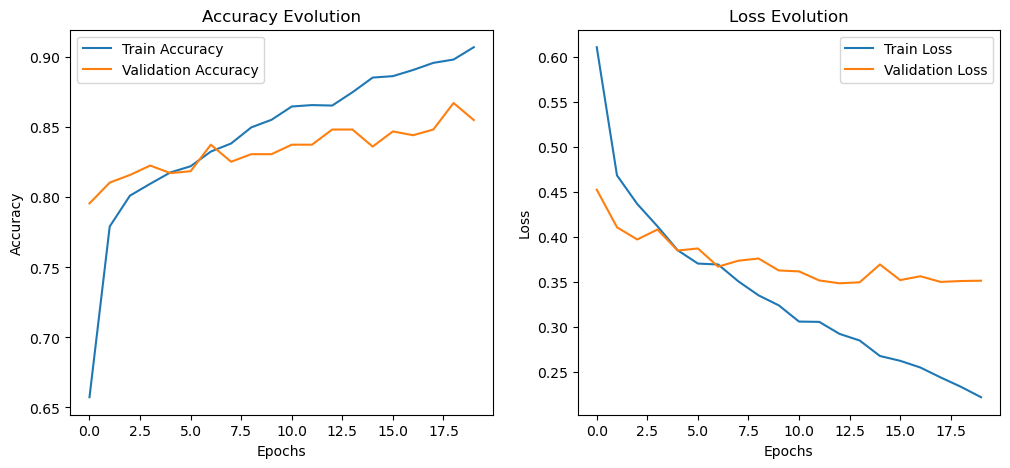

In [ ]:
import matplotlib.pyplot as plt
import os


# 📌 Tracer l'évolution de la précision et de la perte pendant l'entraînement
plt.figure(figsize=(12, 5))

# Précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

# Perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Evolution')

# 💾 Sauvegarde dans le dossier courant
plt.savefig('training_curves.png')

# Affichage
plt.show()



24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step
📊 Classification Report:
              precision    recall  f1-score   support

      Benign       0.86      0.86      0.86       399
   Malignant       0.84      0.84      0.84       340

    accuracy                           0.85       739
   macro avg       0.85      0.85      0.85       739
weighted avg       0.85      0.85      0.85       739



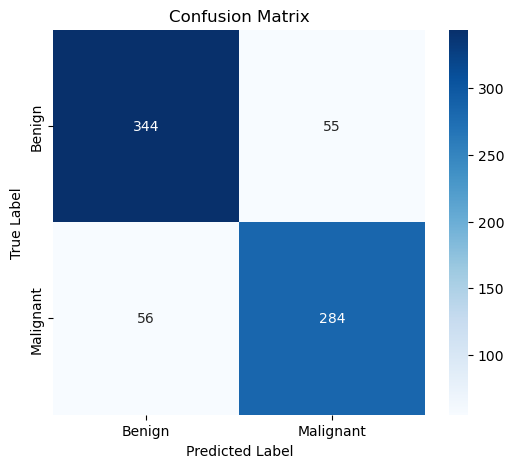

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Prédictions sur le test set
y_pred_probs = best_model.predict(X_test)  # Probabilités de sortie
y_pred = (y_pred_probs > 0.5).astype(int)  # Convertir en classes binaires (0 ou 1)

# 📊 Classification Report (texte)
report = classification_report(y_test, y_pred, target_names=["Benign", "Malignant"])
print("📊 Classification Report:")
print(report)

# 💾 Sauvegarder le classification report dans un fichier texte
with open("classification_report.txt", "w") as f:
    f.write("📊 Classification Report:\n")
    f.write(report)

# 📌 Générer la Matrice de Confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# 📌 Affichage avec Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# 💾 Sauvegarder la figure dans le dossier courant
plt.savefig("confusion_matrix.png")

# Affichage
plt.show()
